In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, LeakyReLU, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [ ]:
 !gdown --id 1leY5kJRbk4URDuciIx2EqN5n3GtvdrMS

Downloading...
From: https://drive.google.com/uc?id=1leY5kJRbk4URDuciIx2EqN5n3GtvdrMS
To: /content/EEG_Dataset.zip
1.32GB [00:08, 158MB/s]


In [ ]:
!unzip 'EEG_Dataset.zip'

Archive:  EEG_Dataset.zip
   creating: archive/
   creating: archive/GAMEEMO/
   creating: archive/GAMEEMO/(S01)/
   creating: archive/GAMEEMO/(S01)/Preprocessed EEG Data/
  inflating: archive/GAMEEMO/(S01)/Preprocessed EEG Data/S01G1AllChannels.csv  
  inflating: archive/GAMEEMO/(S01)/Preprocessed EEG Data/S01G2AllChannels.csv  
  inflating: archive/GAMEEMO/(S01)/Preprocessed EEG Data/S01G3AllChannels.csv  
  inflating: archive/GAMEEMO/(S01)/Preprocessed EEG Data/S01G4AllChannels.csv  
   creating: archive/GAMEEMO/(S01)/Raw EEG Data/
   creating: archive/GAMEEMO/(S01)/Raw EEG Data/.csv format/
  inflating: archive/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G1AllRawChannels.csv  
  inflating: archive/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G2AllRawChannels.csv  
  inflating: archive/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G3AllRawChannels.csv  
  inflating: archive/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G4AllRawChannels.csv  
   creating: archive/GAMEEMO/(S01)/Raw EEG Data/.mat f

In [ ]:
directories = glob.glob('archive/GAMEEMO/*')
dir_len = len(directories)
for i in range(dir_len):
  directories[i] += '/Preprocessed EEG Data/*'
  directories[i] = glob.glob(directories[i])

In [ ]:
raw_eeg= []
labels = []
for p in directories:
  for r in p:
    l = r.split('/')[-1][4]
    Df = pd.read_csv(r)
    raw_eeg.append(Df.iloc[0:,0:14].values.tolist())
    labels.append(int(l)-1)

In [ ]:
n = len(raw_eeg)
# train_range = int(n*0.8)
# train_X = []
# train_Y = []
# for i in range(train_range):
#   for row in raw_eeg[i]:
#     train_X.append(row)
#     train_Y.append(labels[i])
# train_Y_onehot = to_categorical(train_Y)
train_X = np.array(raw_eeg[0:int(n*0.8)])
train_Y = np.array(to_categorical(labels[0:int(n*0.8)],num_classes=4))
test_X = np.array(raw_eeg[int(n*0.8):])
test_Y = np.array(labels[int(n*0.8):])
# for i in range(train_range,participants):
#   for row in raw_eeg[i]:
#     test_X.append(row)
#     test_Y.append(labels[i])
# test_Y_onehot = to_categorical(test_Y)

In [ ]:
inputs = Input(shape=train_X.shape[1:])
x = Flatten()(inputs)
x = Dense(units=50)(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=50)(x)
x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=200)(x)
# x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=200)(x)
# x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=200)(x)
# x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=128)(x)
# x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=32)(x)
# x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
outputs = Dense(units=4,activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
#print model summary here
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38252, 14)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 535528)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                26776450  
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50)                0     

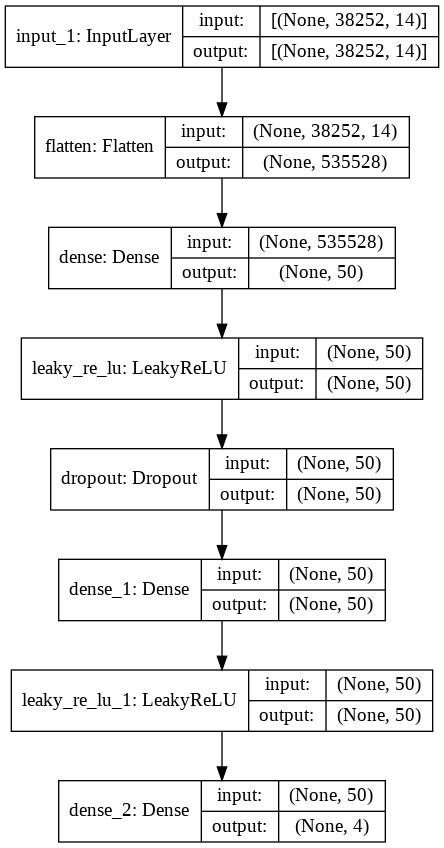

In [ ]:
plot_model(model, "DL.png", show_shapes=True)

In [ ]:
batch_size = 10
lr = 10e-6
epochs=25

In [ ]:
model.compile(optimizer=Adam(learning_rate=lr), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
history = model.fit(x=train_X,y=train_Y,epochs=epochs,
                 batch_size=batch_size,validation_split=0.1)

Epoch 1/25
8/8 [==============================] - 3s 81ms/step - loss: 18.3318 - accuracy: 0.3356 - val_loss: 21.7324 - val_accuracy: 0.2222
Epoch 2/25
8/8 [==============================] - 0s 23ms/step - loss: 2.8583 - accuracy: 0.7918 - val_loss: 12.7068 - val_accuracy: 0.5556
Epoch 3/25
8/8 [==============================] - 0s 24ms/step - loss: 0.4052 - accuracy: 0.9711 - val_loss: 12.9093 - val_accuracy: 0.5556
Epoch 4/25
8/8 [==============================] - 0s 22ms/step - loss: 0.0965 - accuracy: 0.9866 - val_loss: 12.7900 - val_accuracy: 0.5556
Epoch 5/25
8/8 [==============================] - 0s 20ms/step - loss: 0.1397 - accuracy: 0.9916 - val_loss: 12.6533 - val_accuracy: 0.5556
Epoch 6/25
8/8 [==============================] - 0s 21ms/step - loss: 1.0546e-05 - accuracy: 1.0000 - val_loss: 12.5459 - val_accuracy: 0.5556
Epoch 7/25
8/8 [==============================] - 0s 22ms/step - loss: 0.3287 - accuracy: 0.9684 - val_loss: 12.4425 - val_accuracy: 0.5556
Epoch 8/25
8/8 

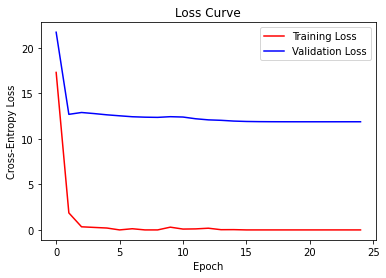

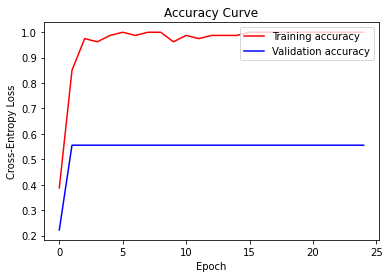

In [ ]:
plt.plot([i for i in range(epochs)], history.history['loss'], 'r-', label="Training Loss")
plt.plot([i for i in range(epochs)], history.history['val_loss'], 'b-', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss Curve")
plt.legend(loc="upper right")
plt.show()

plt.plot([i for i in range(epochs)], history.history['accuracy'], 'r-', label="Training accuracy")
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], 'b-', label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Accuracy Curve")
plt.legend(loc="upper right")
plt.show()

In [ ]:
pred_labels = model.predict(test_X).argmax(axis=1)
correct = 0
total = len(pred_labels)
for i in range(total):
  if pred_labels[i] == test_Y[i]:
    correct += 1
accuracy = correct/total
print("Test Accuracy:",accuracy*100)

Test Accuracy: 91.30434782608695


In [ ]:
cm = confusion_matrix(test_Y, pred_labels)
# dictionary = {0:'Bored',1:'Calm',2:'Horrified',3:'Happy'}
# dictionary[test_Y]
['Bored','Calm','Horrified','Happy']

['Bored', 'Calm', 'Horrified', 'Happy']

In [ ]:
def plot_confusion_matrix(conf_mat):
  classes = list(labels)
  df_cm = pd.DataFrame(conf_mat,columns=['Bored','Calm','Horrified','Happy'],index=['Bored','Calm','Horrified','Happy'])
  plt.figure(figsize=(10,7))
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
  plt.show()

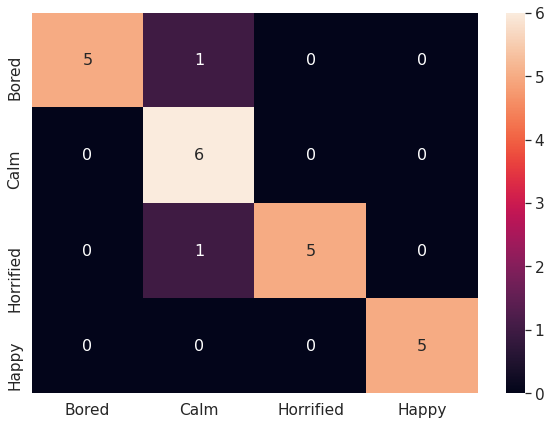

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
print(classification_report(test_Y, pred_labels,target_names=['Bored','Calm','Horrified','Happy']))

              precision    recall  f1-score   support

       Bored       1.00      0.83      0.91         6
        Calm       0.75      1.00      0.86         6
   Horrified       1.00      0.83      0.91         6
       Happy       1.00      1.00      1.00         5

    accuracy                           0.91        23
   macro avg       0.94      0.92      0.92        23
weighted avg       0.93      0.91      0.92        23



# CNN

In [ ]:
# inputs = Input(shape=train_X.shape[1:])
# x = Flatten()(inputs)
# x = Dense(units=50)(x)
# x = LeakyReLU()(x)
# x = Dropout(rate=0.2)(x)
# x = Dense(units=50)(x)
# x = LeakyReLU()(x)
X_shape = train_X.shape
X_train_conv = train_X.reshape(-1,X_shape[1],X_shape[2],1)
X_test_conv = test_X.reshape(-1,X_shape[1],X_shape[2],1)

In [ ]:
inputs = Input(shape=X_test_conv.shape[1:])
x = Conv2D(filters=10,kernel_size=(5,5),strides=(2,2),padding='same')(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.2)(x)
x = Conv2D(filters=5,kernel_size=(3,3),strides=(2,2),padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.2)(x)
x = Flatten()(x)
x = Dense(units=5)(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.2)(x)
outputs = Dense(units=4,activation='softmax')(x)
model_conv = Model(inputs=inputs, outputs=outputs,name='CNN')
model_conv.summary()
# plot_model(model_conv,"model.png")

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 38252, 14, 1)]    0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19126, 7, 10)      260       
_________________________________________________________________
batch_normalization (BatchNo (None, 19126, 7, 10)      40        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 19126, 7, 10)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19126, 7, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9563, 4, 5)        455       
_________________________________________________________________
batch_normalization_1 (Batch (None, 9563, 4, 5)        20      

In [ ]:
batch_size = 10
lr = 10e-6
epochs=40
model_conv.compile(optimizer=Adam(learning_rate=lr), metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
lr = 1e-2
lr

0.01

In [ ]:
history = model_conv.fit(x=X_train_conv,y=train_Y,epochs=epochs,
                 batch_size=batch_size,validation_split=0.1)

Epoch 1/40
8/8 [==============================] - 29s 62ms/step - loss: 1.6553 - accuracy: 0.3314 - val_loss: 1.6923 - val_accuracy: 0.2222
Epoch 2/40
8/8 [==============================] - 0s 32ms/step - loss: 1.3454 - accuracy: 0.3325 - val_loss: 1.1604 - val_accuracy: 0.4444
Epoch 3/40
8/8 [==============================] - 0s 33ms/step - loss: 1.1704 - accuracy: 0.4755 - val_loss: 1.0047 - val_accuracy: 0.4444
Epoch 4/40
8/8 [==============================] - 0s 32ms/step - loss: 0.9750 - accuracy: 0.5947 - val_loss: 1.0652 - val_accuracy: 0.4444
Epoch 5/40
8/8 [==============================] - 0s 33ms/step - loss: 0.8298 - accuracy: 0.7166 - val_loss: 1.0168 - val_accuracy: 0.4444
Epoch 6/40
8/8 [==============================] - 0s 32ms/step - loss: 0.7216 - accuracy: 0.7897 - val_loss: 0.9331 - val_accuracy: 0.5556
Epoch 7/40
8/8 [==============================] - 0s 34ms/step - loss: 0.6681 - accuracy: 0.8560 - val_loss: 0.9019 - val_accuracy: 0.5556
Epoch 8/40
8/8 [==========

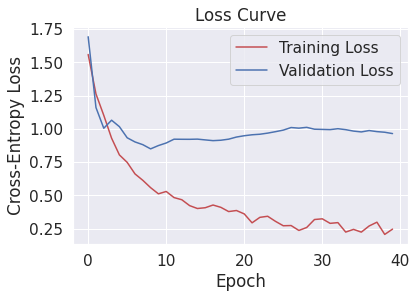

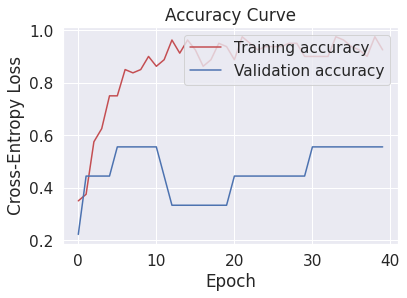

In [ ]:
plt.plot([i for i in range(epochs)], history.history['loss'], 'r-', label="Training Loss")
plt.plot([i for i in range(epochs)], history.history['val_loss'], 'b-', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Loss Curve")
plt.legend(loc="upper right")
plt.show()

plt.plot([i for i in range(epochs)], history.history['accuracy'], 'r-', label="Training accuracy")
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], 'b-', label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Accuracy Curve")
plt.legend(loc="upper right")
plt.show()

In [ ]:
pred_labels = model_conv.predict(X_test_conv).argmax(axis=1)
correct = 0
total = len(pred_labels)
for i in range(total):
  if pred_labels[i] == test_Y[i]:
    correct += 1
accuracy = correct/total
print("Test Accuracy:",accuracy*100)

Test Accuracy: 91.30434782608695


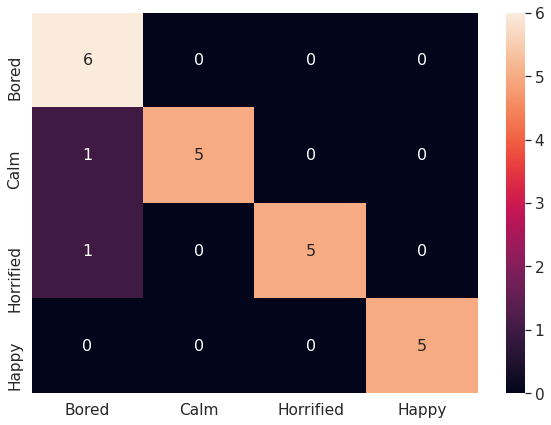

In [ ]:
cm = confusion_matrix(test_Y, pred_labels)
plot_confusion_matrix(cm)

In [ ]:
print(classification_report(test_Y, pred_labels,target_names=['Bored','Calm','Horrified','Happy']))

              precision    recall  f1-score   support

       Bored       0.75      1.00      0.86         6
        Calm       1.00      0.83      0.91         6
   Horrified       1.00      0.83      0.91         6
       Happy       1.00      1.00      1.00         5

    accuracy                           0.91        23
   macro avg       0.94      0.92      0.92        23
weighted avg       0.93      0.91      0.92        23

